# Evaluates trained models.
Makes use of the saved histories and renders them for visual comparison.

In [1]:
%matplotlib inline
from cgmcore.utils import find_timestamps_of_trained_models, plot_date_times, find_all_history_paths

WARNING! VTK not available. This might limit the functionality.


In [2]:
output_path = "../data/output/"

# Find all date-times.
Extracts the timestamps. Different timestamps will represent different models/trainings.

In [3]:
date_times = find_timestamps_of_trained_models(output_path)
date_times = date_times[-3:]
print(date_times)

['20181101-1643', '20181101-2145', '20181104-0039']


# Processes the histories of date-times.

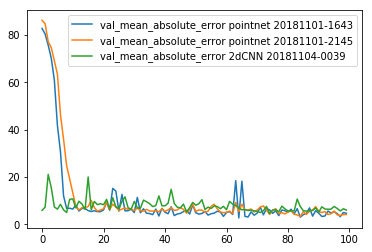

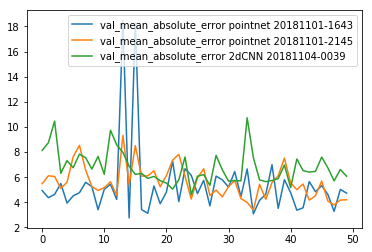

Done.


In [4]:
history_paths = find_all_history_paths(output_path)

# Render MAE for whole histories.
plot_date_times(date_times, history_paths, start_index=0, end_index=100, key_suffix="val_mean_absolute_error")

# Render MAE for the histories while skipping the first 50 epochs.
plot_date_times(date_times, history_paths, start_index=50, end_index=100, key_suffix="val_mean_absolute_error")
print("Done.")